<a href="https://colab.research.google.com/github/marianfoo/ShopDataML/blob/master/notebooks/Aufgabe_Shopdaten_Tree_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relevante Bibliotheken importieren

- transact_train   = Transaktionsdaten zum trainieren
- transact_class   = aktuelle Transaktionsdaten zum testen
- realclass_t1     = "Lösung" der transact_class ob Käufer oder nicht

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Methoden für den Import der vorbereiteten Daten

In [0]:
def get_test_data(train_df,test_df):
    X_train = train_df.iloc[:, :train_df.shape[1] - 1]
    X_test = test_df.iloc[:, :test_df.shape[1] - 1]
    y_train = train_df['order']
    y_test  = test_df['order']
    return X_train, X_test, y_train, y_test

In [0]:
def import_data_2(path):
    df = pd.read_csv(path)
    df.set_index('sessionNo', inplace=True)
    df.sort_index(inplace=True)
    return df
def get_all_data():
    columns_data = ['X_train_','X_test_','y_train_','y_test_']
    fill_modes = ['mean','mode','median']
    column_count = [5,10,15,20]
    new_dict = {}

    for fill_mode in fill_modes:
        for count in column_count:
            filename_base = '~/Google Drive/Studium/StrategischeSysteme/data/'
            filename_2 = filename_base + 'train' + '_' + fill_mode + '_' + str(count) + '.csv'
            train_file = import_data_2(filename_2)
            filename_2 = filename_base + 'class' + '_' + fill_mode + '_' + str(count) + '.csv'
            class_file = import_data_2(filename_2)
            X_train, X_test, y_train, y_test = get_test_data(train_file,class_file)
            new_dict[fill_mode + '_' + str(count)] = {
                'X_train':X_train,
                'X_test':X_test,
                'y_train':y_train,
                'y_test':y_test
            }
    return new_dict

In [0]:
def import_data_colab(path):
    df = pd.read_csv(path)
    df.set_index('sessionNo', inplace=True)
    df.sort_index(inplace=True)
    return df
def get_all_data_colab():
    columns_data = ['X_train_','X_test_','y_train_','y_test_']
    fill_modes = ['mean','mode','median']
    column_count = [5,10,15,20]
    new_dict = {}

    for fill_mode in fill_modes:
        for count in column_count:
            filename_base = 'https://raw.githubusercontent.com/marianfoo/ShopDataML/master/data/'
            filename_2 = filename_base + 'train' + '_' + fill_mode + '_' + str(count) + '.csv'
            train_file = import_data_colab(filename_2)
            filename_2 = filename_base + 'class' + '_' + fill_mode + '_' + str(count) + '.csv'
            class_file = import_data_colab(filename_2)
            X_train, X_test, y_train, y_test = get_test_data(train_file,class_file)
            new_dict[fill_mode + '_' + str(count)] = {
                'X_train':X_train,
                'X_test':X_test,
                'y_train':y_train,
                'y_test':y_test
            }
    return new_dict

# K nearest neighbor

In [0]:
data_knn = get_all_data_colab()

## Spalten visualisieren

In [0]:
def down_size_data(factor, df):
    print('Shape of dataframe before down sizing with factor' + str(factor) +':' + str(df.shape))
    sampleSize = int(len(df.index) * factor)
    df = df.sample(sampleSize)
    print('Shape of dataframe after down sizing with factor' + str(factor) + ':' + str(df.shape))
    return df

In [0]:
data_median_5_plot_X = data_knn['median_5']['X_train']
data_median_5_plot_y = data_knn['median_5']['y_train']
data_median_5_plot_m = data_median_5_plot_X.merge(data_median_5_plot_y.to_frame(), left_index=True, right_index=True)
data_median_5_plot_m = down_size_data(0.01,data_median_5_plot_m)

NameError: ignored

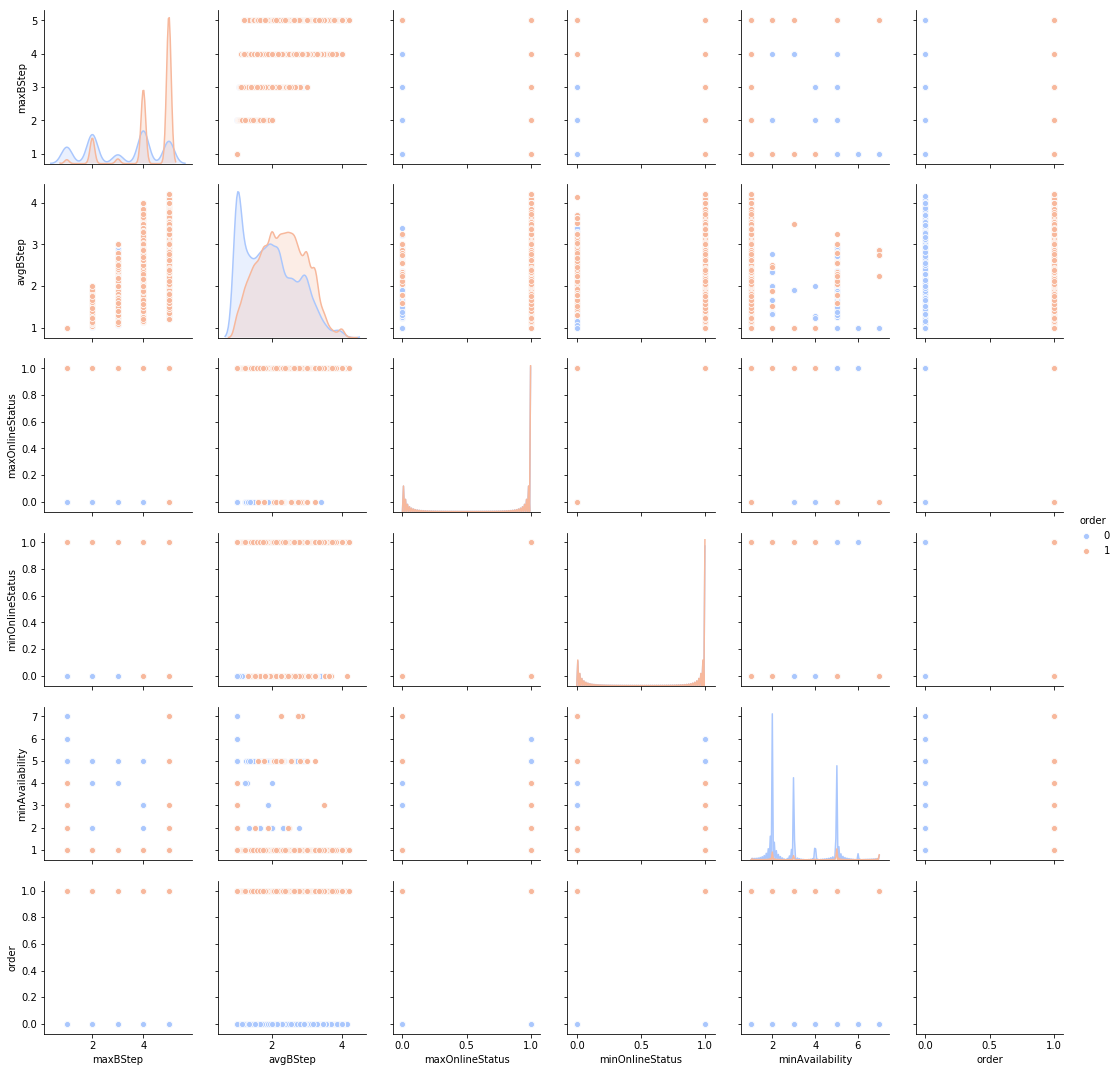

In [0]:
sns.pairplot(data_median_5_plot_m,hue='order',palette='coolwarm')

# Variablen standardisieren

### über alle Testdaten iterieren

In [0]:
from sklearn.preprocessing import StandardScaler
for key, value in data_knn.items():
    scaler_knn = StandardScaler()
    scaler_knn.fit(value['X_train'])
    scaled_features = scaler_knn.transform(value['X_train'])
    df_feat = pd.DataFrame(scaled_features,columns=value['X_train'].columns)

## KNN mit allen Testdateien tranieren und testen

In [0]:
from sklearn.neighbors import KNeighborsClassifier
models_knn = {}
for key, value in data_knn.items():
    knn_model = KNeighborsClassifier(n_neighbors=23)
    knn_model.fit(value['X_train'], value['y_train'])
    prediction_knn = knn_model.predict(value['X_test'])
    models_knn[key] = [knn_model,prediction_knn]

In [0]:
index_data_knn = []
column_data_knn = []
for key, value in models_knn.items():
    index_data_knn.append(key)
    column_data_knn.append(value[0].score(data_knn[key]['X_test'], data_knn[key]['y_test'])*100)


In [0]:
df_data_knn = pd.DataFrame(index=index_data_knn, data=column_data_knn)
df_data_knn.columns = ["performance"]
df_data_knn.sort_values(by="performance", ascending=True, inplace=True)

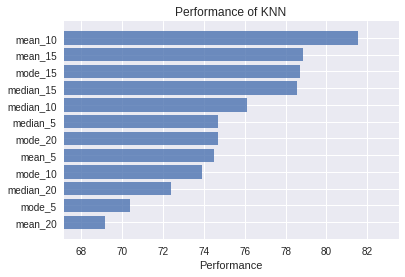

In [0]:
objects = df_data_knn.index.values
y_pos = np.arange(len(objects))
performance = df_data_knn.iloc[:,0]

plt.barh(y_pos, performance, align='center', alpha=0.8,left=0)
plt.xlim(performance.min()-2, performance.max()+2)
plt.yticks(y_pos, objects)
plt.xlabel('Performance')
plt.title('Performance of KNN')

plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23)

In [0]:
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform')

In [0]:
prediction_knn = knn.predict(X_test_knn)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_knn,prediction_knn))
print(classification_report(y_test_knn,prediction_knn))

[[ 1640 12754]
 [ 1448 29226]]
              precision    recall  f1-score   support

           0       0.53      0.11      0.19     14394
           1       0.70      0.95      0.80     30674

   micro avg       0.68      0.68      0.68     45068
   macro avg       0.61      0.53      0.50     45068
weighted avg       0.64      0.68      0.61     45068



## Iterating over couple of n_neighbors to test error rate

In [0]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn_loop = KNeighborsClassifier(n_neighbors=i)
    knn_loop.fit(X_train_knn,y_train_knn)
    prediciton_knn_i = knn_loop.predict(X_test_knn)
    error_rate.append(np.mean(prediciton_knn_i != y_test_knn))
    print(i, flush=True)

Text(0, 0.5, 'Error Rate')

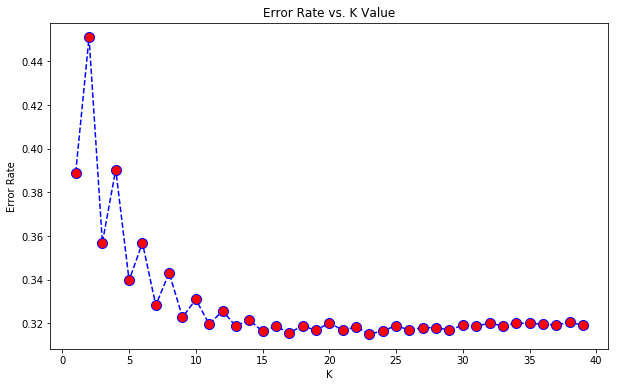

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Wahrscheinlichkeit mit den am besten performenden Testdaten

In [0]:
dataset = 'mean_15'

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_mean_10 = KNeighborsClassifier(n_neighbors=23)
knn_model_mean_10.fit(data_knn[dataset]['X_train'], data_knn[dataset]['y_train'])
prediction_knn_mean_10 = knn_model_mean_10.predict(data_knn[dataset]['X_train'])
performance_knn_mean_10 = knn_model_mean_10.score(data_knn[dataset]['X_test'], data_knn[dataset]['y_test'])*100

In [0]:
data_knn[dataset]['X_test'].loc[data_knn[dataset]['X_test'].index == 6]

,startHour,startWeekday,bCount,bStep,onlineStatus,availability,address,maxBStep,avgBStep,countTransact,maxAvailability,maxOnlineStatus,avgAvailability,minOnlineStatus,minAvailability
sessionNo,,,,,,,,,,,,,,,
6,18,7,1,2.240844,0.992098,1.084581,1.0,3.670721,2.165526,3.0,1.416904,0.997734,1.106449,0.98638,1.026647
6,18,7,2,2.240844,0.992098,1.084581,1.0,3.670721,2.165526,3.0,1.416904,0.997734,1.106449,0.98638,1.026647
6,18,7,3,2.240844,0.992098,1.084581,1.0,3.670721,2.165526,3.0,1.416904,0.997734,1.106449,0.98638,1.026647


In [0]:
performance_knn_mean_10 = knn_model_mean_10.score(data_knn[dataset]['X_test'], data_knn[dataset]['y_test'])*100

In [0]:
performance_knn_mean_10

78.8386438271057

In [0]:
predict_proba_knn_mean_10 = knn_model_mean_10.predict_proba(data_knn[dataset]['X_test'])
predict_proba_knn_mean_10

array([[0.34782609, 0.65217391],
       [0.39130435, 0.60869565],
       [0.26086957, 0.73913043],
       ...,
       [0.52173913, 0.47826087],
       [0.65217391, 0.34782609],
       [0.52173913, 0.47826087]])

In [0]:
loss_ndarray = predict_proba_knn_mean_10[...,:1]
win_ndarray = predict_proba_knn_mean_10[...,1:]
my_list_test = map(lambda x: x[0], loss_ndarray)
loss_series = pd.Series(my_list_test)
my_list_test = map(lambda x: x[0], win_ndarray)
win_series = pd.Series(my_list_test)

In [0]:
knn_probability_df = pd.DataFrame({'buy_proba': win_series, 'not_buy_proba': loss_series},index=data_knn[dataset]['X_test'].index)
knn_probability_df = knn_probability_df.sort_index()

In [0]:
knn_probability_df_group = knn_probability_df.groupby(knn_probability_df.index).max()

In [0]:
data_knn_proba_merge = data_knn[dataset]['X_test'].join(knn_probability_df_group)
data_knn_proba_merge.loc[knn_probability_df_group['buy_proba'] > 0.9999999]
#data_knn_proba_merge.loc[data_knn['mean_10']['X_test'].index == 8]

,startHour,startWeekday,bCount,bStep,onlineStatus,availability,address,maxBStep,avgBStep,countTransact,maxAvailability,maxOnlineStatus,avgAvailability,minOnlineStatus,minAvailability,buy_proba,not_buy_proba
sessionNo,,,,,,,,,,,,,,,,,
12,18,7,1,2.240844,0.992098,1.084581,2.000000,5.000000,3.250000,6.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.0,0.0
12,18,7,2,2.240844,0.992098,1.084581,2.000000,5.000000,3.250000,6.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.0,0.0
12,18,7,2,1.000000,1.000000,1.000000,2.000000,5.000000,3.250000,6.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.0,0.0
12,18,7,2,3.000000,1.000000,1.000000,2.000000,5.000000,3.250000,6.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.0,0.0
12,18,7,2,4.000000,1.000000,1.000000,2.000000,5.000000,3.250000,6.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.0,0.0
12,18,7,2,5.000000,1.000000,1.000000,2.000000,5.000000,3.250000,6.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.0,0.0
14,18,7,1,2.240844,0.992098,1.084581,2.000000,3.670721,2.165526,7.0,1.416904,0.997734,1.106449,0.98638,1.026647,1.0,0.0
14,18,7,2,2.240844,0.992098,1.084581,2.000000,3.670721,2.165526,7.0,1.416904,0.997734,1.106449,0.98638,1.026647,1.0,0.0
14,18,7,3,2.240844,0.992098,1.084581,2.000000,3.670721,2.165526,7.0,1.416904,0.997734,1.106449,0.98638,1.026647,1.0,0.0


In [0]:
print("Anteil an 100% Kauf Wahrscheinlichkeit")
knn_probability_df_group.loc[knn_probability_df_group['buy_proba'] == 1].size / knn_probability_df_group.size


Anteil an 100% Kauf Wahrscheinlichkeit


0.3676384269223244

In [0]:
knn_probability_df_group = knn_probability_df.groupby(knn_probability_df.index).max()
bins_groupby = np.arange(0, 1.000001, 0.05)
knn_probability_df_group_bin = knn_probability_df_group.groupby(pd.cut(knn_probability_df_group['buy_proba'],bins_groupby)).count()

In [0]:
knn_probability_df_group_bin

,buy_proba,not_buy_proba
buy_proba,,
"(0.0, 0.05]",80,80
"(0.05, 0.1]",119,119
"(0.1, 0.15]",107,107
"(0.15, 0.2]",111,111
"(0.2, 0.25]",58,58
"(0.25, 0.3]",67,67
"(0.3, 0.35]",201,201
"(0.35, 0.4]",99,99
"(0.4, 0.45]",60,60


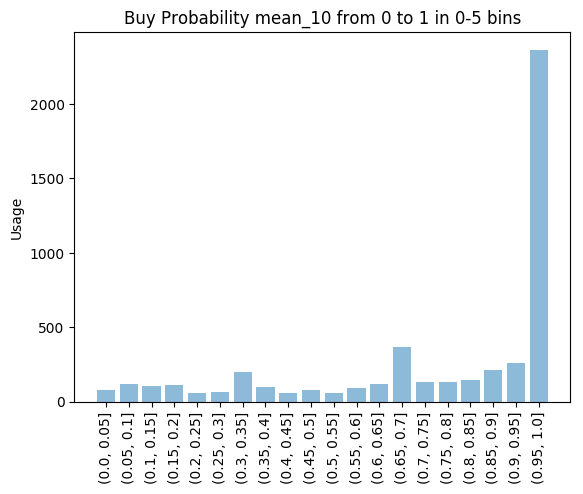

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = knn_probability_df_group_bin.index.values
y_pos = np.arange(len(objects))
performance = knn_probability_df_group_bin['buy_proba']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation='vertical')
plt.ylabel('Usage')
plt.title('Buy Probability mean_10 from 0 to 1 in 0-5 bins')
 
plt.show()

# Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [0]:
data_dtc = get_all_data_colab()

In [0]:
dataset = 'mean_10'

In [21]:
dtree.fit(data_dtc[dataset]['X_train'], data_dtc[dataset]['y_train'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
predictions = dtree.predict(data_dtc[dataset]['X_test'])

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(data_dtc[dataset]['y_test'],predictions))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69     14394
           1       0.85      0.85      0.85     30674

   micro avg       0.80      0.80      0.80     45068
   macro avg       0.77      0.77      0.77     45068
weighted avg       0.80      0.80      0.80     45068



In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=600)

In [26]:
rfc.fit(data_dtc[dataset]['X_train'], data_dtc[dataset]['y_train'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
predictions_rfc = rfc.predict(data_dtc[dataset]['X_test'])
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(data_dtc[dataset]['y_test'],predictions_rfc))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72     14394
           1       0.86      0.89      0.87     30674

   micro avg       0.82      0.82      0.82     45068
   macro avg       0.80      0.79      0.79     45068
weighted avg       0.82      0.82      0.82     45068



In [28]:
print(confusion_matrix(data_dtc[dataset]['y_test'],predictions_rfc))

[[ 9929  4465]
 [ 3438 27236]]
